<a href="https://colab.research.google.com/github/raj-ryan/Fall-Detection/blob/main/Fall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!py -3.10 -m venv myvenv
!myvenv\Scripts\activate

!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

/bin/bash: line 1: py: command not found
/bin/bash: line 1: myvenvScriptsactivate: command not found
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.5
    Uninstalling pyparsing-2.4.5:
      Successfully uninstalled pyparsing-2.4.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
super-gradients 3.5.0 requires pyparsing==2.4.5, but you have pyparsing 2.4.7 which is incompatible.


In [ ]:
import torch
torch.__version__

'2.1.0+cu118'

In [ ]:
import torch
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
!pip install super-gradients
from super_gradients.training import models

yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

  Using cached pyparsing-2.4.5-py2.py3-none-any.whl (67 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.7
    Uninstalling pyparsing-2.4.7:
      Successfully uninstalled pyparsing-2.4.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.1.12 requires pyparsing==2.4.7, but you have pyparsing 2.4.5 which is incompatible.


The console stream is logged into /root/sg_logs/console.log


[2023-12-11 09:15:06] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-12-11 09:15:06] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-12-11 09:15:06] INFO - utils.py - NumExpr defaulting to 2 threads.
[2023-12-11 09:15:12] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-12-11 09:15:12] WARNING - export.py - Failed to import pytorch_quantization
[2023-12-11 09:15:12] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-12-11 09:15:14] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-12-11 09:15:14] INFO - checkpoint_utils.py - Successfully loaded pretrained weights fo

[2023-12-11 09:15:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


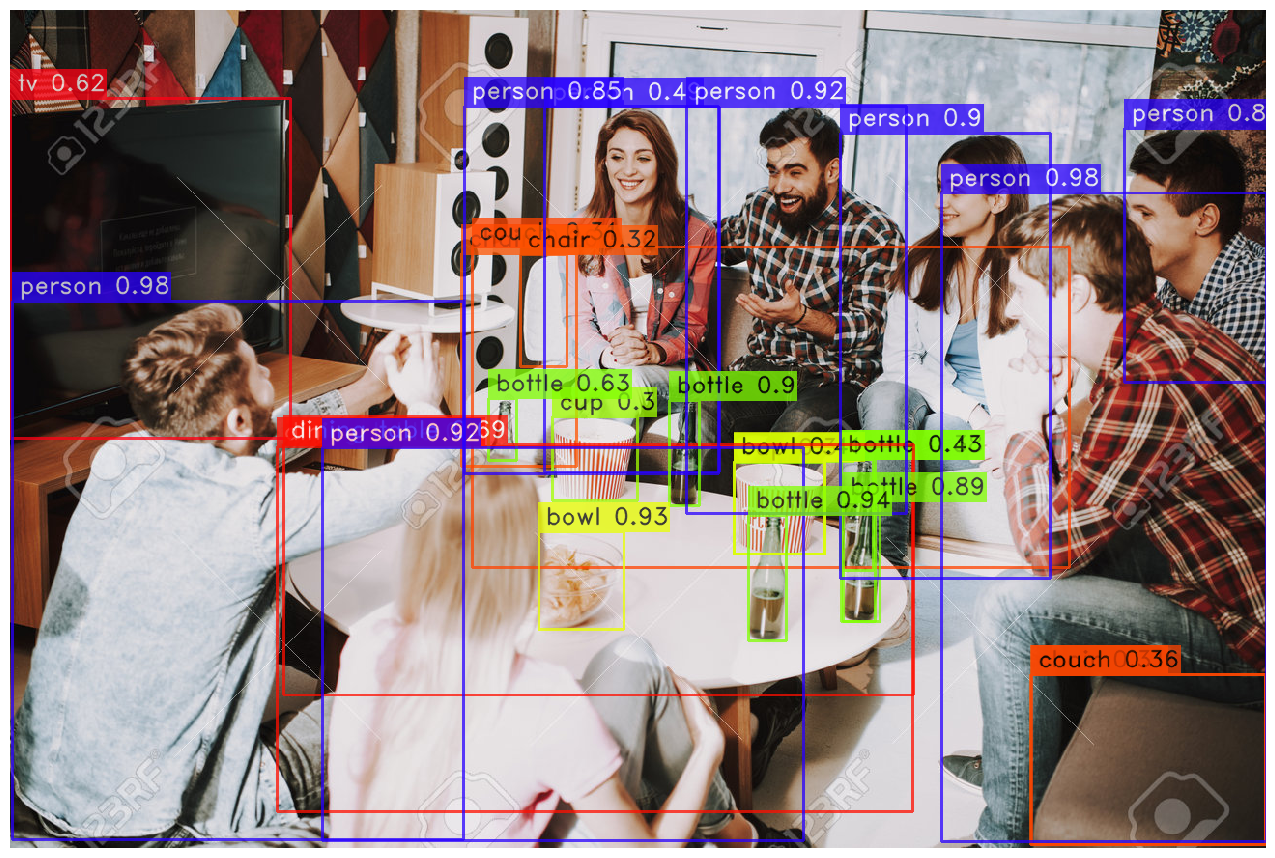

In [ ]:
url = "https://previews.123rf.com/images/freeograph/freeograph2011/freeograph201100150/158301822-group-of-friends-gathering-around-table-at-home.jpg"
yolo_nas_l.predict(url, conf=0.25).show()

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name='fall_detection_1.mp4', length=len(uploaded['fall_detection_3.mp4'])))

In [ ]:
input_video_path = "fall_detection_4.mp4"
output_video_path = "detections.mp4"
device=0

yolo_nas_l.to(device).predict(input_video_path).save(output_video_path)

Processing Video: 100%|██████████| 180/180 [00:05<00:00, 31.32it/s]


In [ ]:
from super_gradients.training import Trainer

CHECKPOINT_DIR = 'checkpoints'
trainer = Trainer(experiment_name='my_first_yolonas_run', ckpt_root_dir=CHECKPOINT_DIR)

In [ ]:
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

In [ ]:
dataset_params = {
    'data_dir':'drive/MyDrive/FallDetection1',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'val/images',
    'val_labels_dir':'val/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ['Fall-Detected','Walking', 'Sitting']
}

In [ ]:
from IPython.display import clear_output

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)
test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

clear_output()

In [ ]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

In [ ]:
# train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42

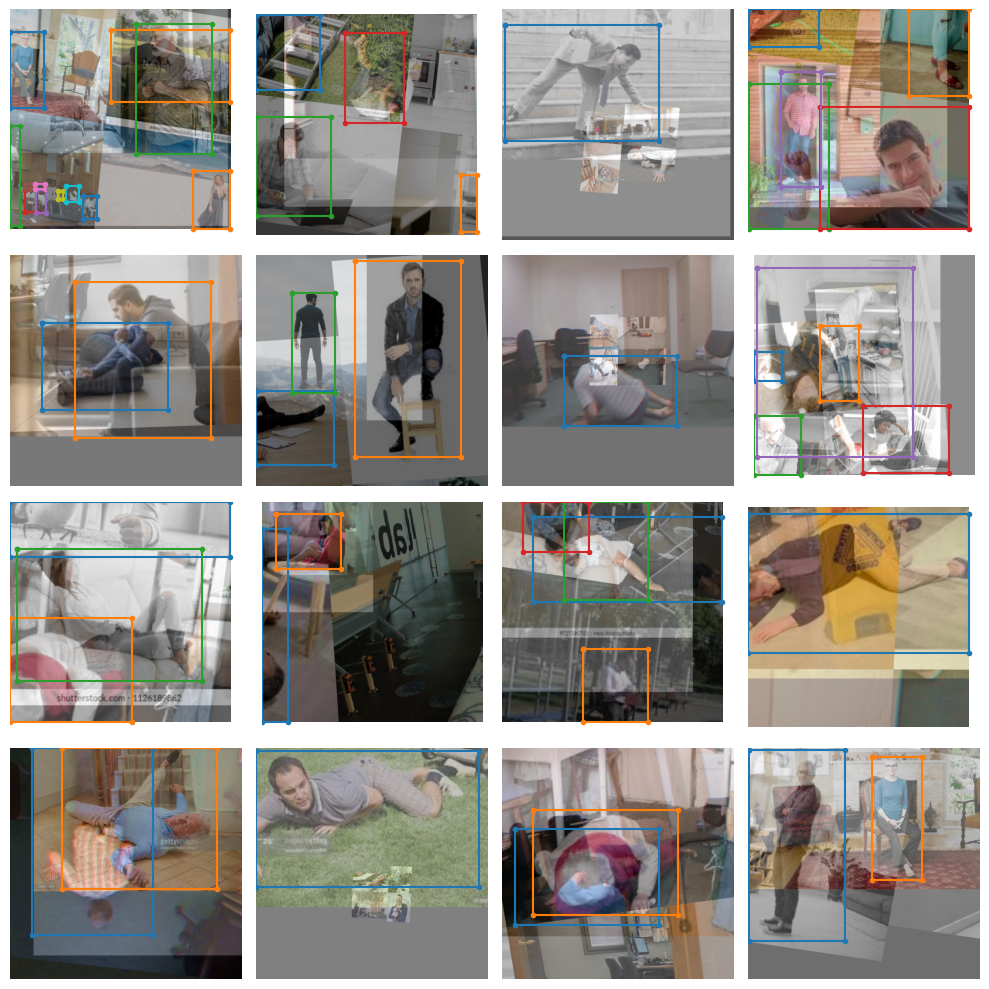

In [ ]:
train_data.dataset.plot()

In [ ]:
from super_gradients.training import models
model = models.get('yolo_nas_l',
                   num_classes=len(dataset_params['classes']),
                   pretrained_weights="coco"
                   )

[2023-12-11 10:20:42] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-12-11 10:20:44] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 10,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [ ]:
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

[2023-12-11 10:20:50] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20231211_102050_690038`
[2023-12-11 10:20:50] INFO - sg_trainer.py - Checkpoints directory: checkpoints/my_first_yolonas_run/RUN_20231211_102050_690038
[2023-12-11 10:20:50] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to checkpoints/my_first_yolonas_run/RUN_20231211_102050_690038/console_Dec11_10_20_50.txt


/usr/local/lib/python3.10/dist-packages/super_gradients/common/registry/registry.py:72: DeprecationWarning: Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
  warnings.warn(f"Object name `{name}` is now deprecated. Please replace it with `{deprecated_names[name]}`.", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/super_gradients/training/utils/optimizer_utils.py:107: DeprecationWarning: initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})
  warnings.warn(
[2023-12-11 10:20:55] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 2.2309
│   ├── Ppyoloeloss/loss_iou = 0.5959
│   ├── Ppyoloeloss/loss_dfl = 0.7393
│   └── Ppyoloeloss/loss = 3.5661
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.5579
    ├── Ppyoloeloss/loss_iou = 0.3913
    ├── Ppyoloeloss/loss_dfl = 0.5877
    ├── Ppyoloeloss/loss = 3.5369
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.115
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]
[2023-12-11 10:23:08] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20231211_102050_690038/ckpt_best.pth
[2023-12-11 10:23:08] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.1699979454278946


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.5355
│   │   ├── Epoch N-1      = 2.2309 (↘ -0.6954)
│   │   └── Best until now = 2.2309 (↘ -0.6954)
│   ├── Ppyoloeloss/loss_iou = 0.5104
│   │   ├── Epoch N-1      = 0.5959 (↘ -0.0855)
│   │   └── Best until now = 0.5959 (↘ -0.0855)
│   ├── Ppyoloeloss/loss_dfl = 0.7009
│   │   ├── Epoch N-1      = 0.7393 (↘ -0.0384)
│   │   └── Best until now = 0.7393 (↘ -0.0384)
│   └── Ppyoloeloss/loss = 2.7468
│       ├── Epoch N-1      = 3.5661 (↘ -0.8193)
│       └── Best until now = 3.5661 (↘ -0.8193)
└── Validation
    ├── Ppyoloeloss/loss_cls = 26.4505
    │   ├── Epoch N-1      = 2.5579 (↗ 23.8926)
    │   └── Best until now = 2.5579 (↗ 23.8926)
    ├── Ppyoloeloss/loss_iou = 0.5571
    │   ├── Epoch N-1      = 0.3913 (↗ 0.1659)
    │   └── Best until now = 0.3913 (↗ 0.1659)
    ├── Ppyoloeloss/loss_dfl = 0.7817
    │   ├── Epoch N-1      = 0.5877 (↗ 0.194)
    │   └── Best until now = 0.5877 (↗ 0.194)
    ├── Ppyoloeloss/loss = 

Validating epoch 2: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2472
│   │   ├── Epoch N-1      = 1.5355 (↘ -0.2883)
│   │   └── Best until now = 1.5355 (↘ -0.2883)
│   ├── Ppyoloeloss/loss_iou = 0.5499
│   │   ├── Epoch N-1      = 0.5104 (↗ 0.0395)
│   │   └── Best until now = 0.5104 (↗ 0.0395)
│   ├── Ppyoloeloss/loss_dfl = 0.7202
│   │   ├── Epoch N-1      = 0.7009 (↗ 0.0193)
│   │   └── Best until now = 0.7009 (↗ 0.0193)
│   └── Ppyoloeloss/loss = 2.5173
│       ├── Epoch N-1      = 2.7468 (↘ -0.2295)
│       └── Best until now = 2.7468 (↘ -0.2295)
└── Validation
    ├── Ppyoloeloss/loss_cls = 12.7057
    │   ├── Epoch N-1      = 26.4505 (↘ -13.7448)
    │   └── Best until now = 2.5579 (↗ 10.1478)
    ├── Ppyoloeloss/loss_iou = 0.6734
    │   ├── Epoch N-1      = 0.5571 (↗ 0.1162)
    │   └── Best until now = 0.3913 (↗ 0.2821)
    ├── Ppyoloeloss/loss_dfl = 0.8556
    │   ├── Epoch N-1      = 0.7817 (↗ 0.0739)
    │   └── Best until now = 0.5877 (↗ 0.2679)
    ├── Ppyoloeloss/loss = 

Validating epoch 3: 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]
[2023-12-11 10:25:48] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20231211_102050_690038/ckpt_best.pth
[2023-12-11 10:25:48] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.3190857768058777


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2497
│   │   ├── Epoch N-1      = 1.2472 (↗ 0.0024)
│   │   └── Best until now = 1.2472 (↗ 0.0024)
│   ├── Ppyoloeloss/loss_iou = 0.5678
│   │   ├── Epoch N-1      = 0.5499 (↗ 0.0179)
│   │   └── Best until now = 0.5104 (↗ 0.0574)
│   ├── Ppyoloeloss/loss_dfl = 0.7389
│   │   ├── Epoch N-1      = 0.7202 (↗ 0.0187)
│   │   └── Best until now = 0.7009 (↗ 0.038)
│   └── Ppyoloeloss/loss = 2.5564
│       ├── Epoch N-1      = 2.5173 (↗ 0.0391)
│       └── Best until now = 2.5173 (↗ 0.0391)
└── Validation
    ├── Ppyoloeloss/loss_cls = 5.9694
    │   ├── Epoch N-1      = 12.7057 (↘ -6.7363)
    │   └── Best until now = 2.5579 (↗ 3.4115)
    ├── Ppyoloeloss/loss_iou = 0.5611
    │   ├── Epoch N-1      = 0.6734 (↘ -0.1123)
    │   └── Best until now = 0.3913 (↗ 0.1698)
    ├── Ppyoloeloss/loss_dfl = 0.7755
    │   ├── Epoch N-1      = 0.8556 (↘ -0.0801)
    │   └── Best until now = 0.5877 (↗ 0.1878)
    ├── Ppyoloeloss/loss = 7.306


Validating epoch 4: 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2569
│   │   ├── Epoch N-1      = 1.2497 (↗ 0.0072)
│   │   └── Best until now = 1.2472 (↗ 0.0096)
│   ├── Ppyoloeloss/loss_iou = 0.5831
│   │   ├── Epoch N-1      = 0.5678 (↗ 0.0153)
│   │   └── Best until now = 0.5104 (↗ 0.0727)
│   ├── Ppyoloeloss/loss_dfl = 0.7486
│   │   ├── Epoch N-1      = 0.7389 (↗ 0.0097)
│   │   └── Best until now = 0.7009 (↗ 0.0477)
│   └── Ppyoloeloss/loss = 2.5885
│       ├── Epoch N-1      = 2.5564 (↗ 0.0321)
│       └── Best until now = 2.5173 (↗ 0.0712)
└── Validation
    ├── Ppyoloeloss/loss_cls = 4.6335
    │   ├── Epoch N-1      = 5.9694 (↘ -1.3359)
    │   └── Best until now = 2.5579 (↗ 2.0756)
    ├── Ppyoloeloss/loss_iou = 0.7437
    │   ├── Epoch N-1      = 0.5611 (↗ 0.1826)
    │   └── Best until now = 0.3913 (↗ 0.3524)
    ├── Ppyoloeloss/loss_dfl = 0.9224
    │   ├── Epoch N-1      = 0.7755 (↗ 0.1469)
    │   └── Best until now = 0.5877 (↗ 0.3346)
    ├── Ppyoloeloss/loss = 6.2996
 

Validating epoch 5: 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.238
│   │   ├── Epoch N-1      = 1.2569 (↘ -0.0189)
│   │   └── Best until now = 1.2472 (↘ -0.0092)
│   ├── Ppyoloeloss/loss_iou = 0.5436
│   │   ├── Epoch N-1      = 0.5831 (↘ -0.0395)
│   │   └── Best until now = 0.5104 (↗ 0.0332)
│   ├── Ppyoloeloss/loss_dfl = 0.7202
│   │   ├── Epoch N-1      = 0.7486 (↘ -0.0283)
│   │   └── Best until now = 0.7009 (↗ 0.0193)
│   └── Ppyoloeloss/loss = 2.5019
│       ├── Epoch N-1      = 2.5885 (↘ -0.0867)
│       └── Best until now = 2.5173 (↘ -0.0154)
└── Validation
    ├── Ppyoloeloss/loss_cls = 4.2581
    │   ├── Epoch N-1      = 4.6335 (↘ -0.3754)
    │   └── Best until now = 2.5579 (↗ 1.7002)
    ├── Ppyoloeloss/loss_iou = 0.6255
    │   ├── Epoch N-1      = 0.7437 (↘ -0.1182)
    │   └── Best until now = 0.3913 (↗ 0.2342)
    ├── Ppyoloeloss/loss_dfl = 0.8372
    │   ├── Epoch N-1      = 0.9224 (↘ -0.0851)
    │   └── Best until now = 0.5877 (↗ 0.2495)
    ├── Ppyoloeloss/loss = 5

Validating epoch 6: 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]
[2023-12-11 10:29:36] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20231211_102050_690038/ckpt_best.pth
[2023-12-11 10:29:36] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.3192707598209381


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1742
│   │   ├── Epoch N-1      = 1.238  (↘ -0.0638)
│   │   └── Best until now = 1.238  (↘ -0.0638)
│   ├── Ppyoloeloss/loss_iou = 0.4987
│   │   ├── Epoch N-1      = 0.5436 (↘ -0.0449)
│   │   └── Best until now = 0.5104 (↘ -0.0117)
│   ├── Ppyoloeloss/loss_dfl = 0.6683
│   │   ├── Epoch N-1      = 0.7202 (↘ -0.0519)
│   │   └── Best until now = 0.7009 (↘ -0.0326)
│   └── Ppyoloeloss/loss = 2.3412
│       ├── Epoch N-1      = 2.5019 (↘ -0.1607)
│       └── Best until now = 2.5019 (↘ -0.1607)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.8072
    │   ├── Epoch N-1      = 4.2581 (↘ -2.4509)
    │   └── Best until now = 2.5579 (↘ -0.7507)
    ├── Ppyoloeloss/loss_iou = 0.5412
    │   ├── Epoch N-1      = 0.6255 (↘ -0.0843)
    │   └── Best until now = 0.3913 (↗ 0.1499)
    ├── Ppyoloeloss/loss_dfl = 0.6961
    │   ├── Epoch N-1      = 0.8372 (↘ -0.1412)
    │   └── Best until now = 0.5877 (↗ 0.1084)
    ├── Ppyoloeloss/loss

Validating epoch 7: 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]
[2023-12-11 10:31:26] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20231211_102050_690038/ckpt_best.pth
[2023-12-11 10:31:26] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.37462249398231506


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1397
│   │   ├── Epoch N-1      = 1.1742 (↘ -0.0345)
│   │   └── Best until now = 1.1742 (↘ -0.0345)
│   ├── Ppyoloeloss/loss_iou = 0.4801
│   │   ├── Epoch N-1      = 0.4987 (↘ -0.0186)
│   │   └── Best until now = 0.4987 (↘ -0.0186)
│   ├── Ppyoloeloss/loss_dfl = 0.6609
│   │   ├── Epoch N-1      = 0.6683 (↘ -0.0075)
│   │   └── Best until now = 0.6683 (↘ -0.0075)
│   └── Ppyoloeloss/loss = 2.2807
│       ├── Epoch N-1      = 2.3412 (↘ -0.0605)
│       └── Best until now = 2.3412 (↘ -0.0605)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.4205
    │   ├── Epoch N-1      = 1.8072 (↘ -0.3867)
    │   └── Best until now = 1.8072 (↘ -0.3867)
    ├── Ppyoloeloss/loss_iou = 0.4494
    │   ├── Epoch N-1      = 0.5412 (↘ -0.0918)
    │   └── Best until now = 0.3913 (↗ 0.0581)
    ├── Ppyoloeloss/loss_dfl = 0.6123
    │   ├── Epoch N-1      = 0.6961 (↘ -0.0837)
    │   └── Best until now = 0.5877 (↗ 0.0246)
    ├── Ppyoloeloss/loss

Validating epoch 8: 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]
[2023-12-11 10:33:21] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20231211_102050_690038/ckpt_best.pth
[2023-12-11 10:33:21] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.4355318248271942


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1183
│   │   ├── Epoch N-1      = 1.1397 (↘ -0.0214)
│   │   └── Best until now = 1.1397 (↘ -0.0214)
│   ├── Ppyoloeloss/loss_iou = 0.4606
│   │   ├── Epoch N-1      = 0.4801 (↘ -0.0195)
│   │   └── Best until now = 0.4801 (↘ -0.0195)
│   ├── Ppyoloeloss/loss_dfl = 0.6476
│   │   ├── Epoch N-1      = 0.6609 (↘ -0.0133)
│   │   └── Best until now = 0.6609 (↘ -0.0133)
│   └── Ppyoloeloss/loss = 2.2265
│       ├── Epoch N-1      = 2.2807 (↘ -0.0542)
│       └── Best until now = 2.2807 (↘ -0.0542)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.3082
    │   ├── Epoch N-1      = 1.4205 (↘ -0.1124)
    │   └── Best until now = 1.4205 (↘ -0.1124)
    ├── Ppyoloeloss/loss_iou = 0.4602
    │   ├── Epoch N-1      = 0.4494 (↗ 0.0108)
    │   └── Best until now = 0.3913 (↗ 0.0689)
    ├── Ppyoloeloss/loss_dfl = 0.6083
    │   ├── Epoch N-1      = 0.6123 (↘ -0.0041)
    │   └── Best until now = 0.5877 (↗ 0.0205)
    ├── Ppyoloeloss/loss 

Validating epoch 9: 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]
[2023-12-11 10:35:47] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20231211_102050_690038/ckpt_best.pth
[2023-12-11 10:35:47] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5317127704620361


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0627
│   │   ├── Epoch N-1      = 1.1183 (↘ -0.0556)
│   │   └── Best until now = 1.1183 (↘ -0.0556)
│   ├── Ppyoloeloss/loss_iou = 0.441
│   │   ├── Epoch N-1      = 0.4606 (↘ -0.0196)
│   │   └── Best until now = 0.4606 (↘ -0.0196)
│   ├── Ppyoloeloss/loss_dfl = 0.6141
│   │   ├── Epoch N-1      = 0.6476 (↘ -0.0335)
│   │   └── Best until now = 0.6476 (↘ -0.0335)
│   └── Ppyoloeloss/loss = 2.1178
│       ├── Epoch N-1      = 2.2265 (↘ -0.1087)
│       └── Best until now = 2.2265 (↘ -0.1087)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.212
    │   ├── Epoch N-1      = 1.3082 (↘ -0.0961)
    │   └── Best until now = 1.3082 (↘ -0.0961)
    ├── Ppyoloeloss/loss_iou = 0.3849
    │   ├── Epoch N-1      = 0.4602 (↘ -0.0752)
    │   └── Best until now = 0.3913 (↘ -0.0063)
    ├── Ppyoloeloss/loss_dfl = 0.5376
    │   ├── Epoch N-1      = 0.6083 (↘ -0.0707)
    │   └── Best until now = 0.5877 (↘ -0.0501)
    ├── Ppyoloeloss/loss

[2023-12-11 10:37:19] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 10: 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


In [ ]:
best_model = models.get('yolo_nas_l',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="/content/checkpoints/my_first_yolonas_run/RUN_20231211_102050_690038/ckpt_best.pth")
                        #checkpoint_path="checkpoints/my_first_yolonas_run/average_model.pth")

In [ ]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))

Testing: 100%|██████████| 6/6 [00:05<00:00,  1.46it/s]

{'PPYoloELoss/loss_cls': 1.0830462,
 'PPYoloELoss/loss_iou': 0.35310233,
 'PPYoloELoss/loss_dfl': 0.57690215,
 'PPYoloELoss/loss': 2.0130506,
 'Precision@0.50': 0.023813994601368904,
 'Recall@0.50': 0.9777777791023254,
 'mAP@0.50': 0.7984395027160645,
 'F1@0.50': 0.04639395698904991}

In [ ]:
import torch
device = 0 if torch.cuda.is_available() else "cpu"

input_video_path = "fall_detection_1.mp4"
output_video_path = "detections11.mp4"
#device=0

best_model.to(device).predict(input_video_path).save(output_video_path)

Processing Video:   0%|          | 0/180 [00:00<?, ?it/s][2023-12-11 10:38:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
/usr/local/lib/python3.10/dist-packages/super_gradients/training/utils/visualization/utils.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("gist_rainbow", num_classes)
Processing Video:  72%|███████▏  | 129/180 [00:03<00:01, 39.16it/s]

[2023-12-11 10:16:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


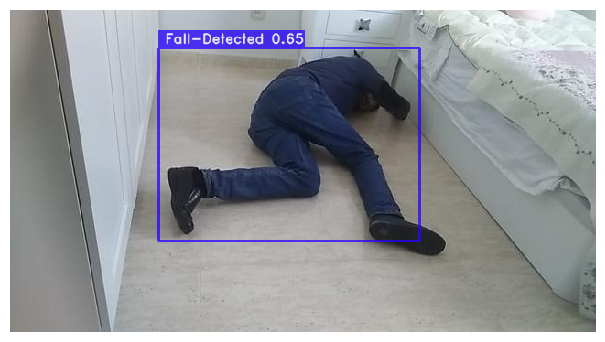

In [ ]:
test_image = 'fall104.jpg'
best_model.predict(test_image).show()